In [101]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()

In [149]:
#petal length & width
X = iris['data'][:100,(2,3)]
y = iris['target'][:100]

In [150]:
y[y == 0] = y[y == 0] - 1
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

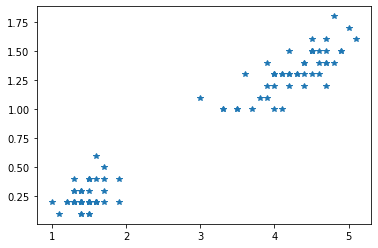

In [6]:
f1,ax1 = plt.subplots()
ax1.plot(X[:,0],X[:,1],'*')

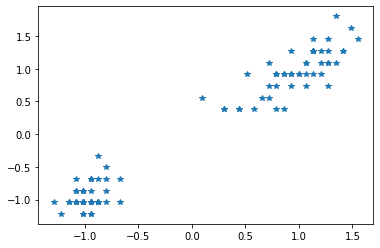

In [151]:
from sklearn.preprocessing import StandardScaler

sclaler = StandardScaler()
X_scaled = sclaler.fit_transform(X)
f2,ax2 = plt.subplots()
ax2.plot(X_scaled[:,0],X_scaled[:,1],'*')

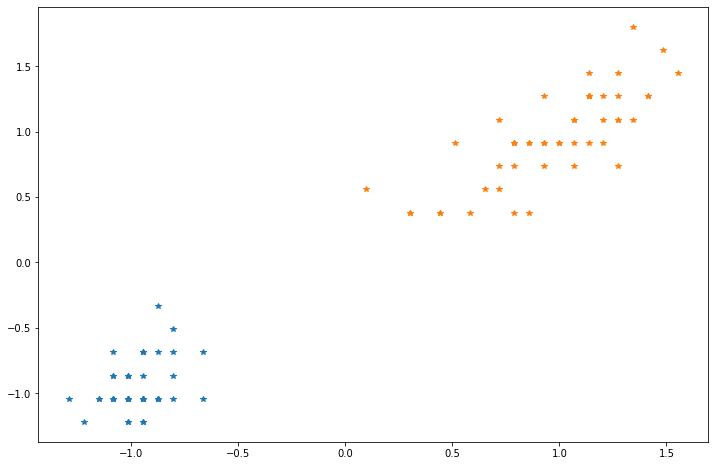

In [174]:
import pandas as pd 
import numpy as np



df = pd.DataFrame(np.c_[X_scaled,y])
df.columns = ["petalLength", "petalWidth", "target"]
df_grouped = df.groupby('target')
f3,ax3 = plt.subplots(figsize=(12,8))
for target , gr in df_grouped:
    ax3.plot(gr.petalLength,gr.petalWidth,'*',label = 'target')

In [175]:
[x0Min,x0Max] = [min(X_scaled[:,0]) - 0.1 , max(X_scaled[:,0]) + 0.1]
[x1Min,x1Max] = [min(X_scaled[:,1]) - 0.1 , max(X_scaled[:,1]) + 0.1]

In [176]:
delta = 0.01
[x0Plt,x1Plt] = np.meshgrid(np.arange(x0Min,x0Max,delta),np.arange(x1Min,x1Max,delta))

In [177]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

y = y.reshape(-1,1) * 1.
X_dash = y * X_scaled
H = np.dot(X_dash,X_dash.T) * 1.

In [178]:
m , n = X.shape
C = 0.01

P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m,1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1,-1))
b = cvxopt_matrix(np.zeros(1))

In [ ]:
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

In [180]:
#w parameter in vectorized form
w = ((y * alphas).T @ X_scaled).reshape(-1,1)

#Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

#Computing b
b = y[S] - np.dot(X_scaled[S], w)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

Alphas =  [0.00905421 0.01       0.00999999 0.00905421 0.00905421 0.00999999
 0.01       0.01       0.00999999 0.01       0.01       0.00999999
 0.01       0.01       0.01       0.00999999 0.01       0.00905421
 0.00999999 0.00999999 0.01       0.00905421 0.00905421 0.00999997
 0.00999997 0.01       0.01       0.00999999 0.00999999 0.00905421
 0.01       0.01       0.01       0.00999998 0.01       0.01
 0.01       0.01       0.00168972 0.01       0.01       0.01
 0.01       0.01       0.00168972 0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01      ]
w =  [0.49629689 0.46958182]
b =  [-0.04231653]


In [181]:
mat_x = np.c_[x0Plt.ravel(),x1Plt.ravel()]
h = mat_x @ w + b[0]
h = h.reshape(x0Plt.shape)

<a list of 8 text.Text objects>

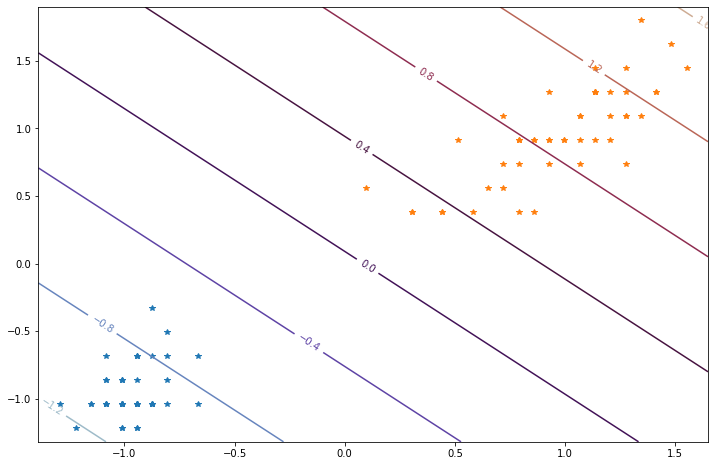

In [182]:
f3,ax3 = plt.subplots(figsize=(12,8))

for target , gr in df_grouped:
    ax3.plot(gr.petalLength,gr.petalWidth,'*',label = 'target')

CS = ax3.contour(x0Plt,x1Plt,h,cmap=plt.cm.twilight)

ax3.clabel(CS)

In [183]:
from sklearn.svm import SVC

svm_clf = SVC(C=0.01 , kernel='linear')
svm_clf.fit(X_scaled,y)

c:\Users\outof\Anaconda3\envs\py10\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.01, kernel='linear')

In [163]:
svm_clf.coef_

array([[0.49629694, 0.46958183]])

In [164]:
svm_clf.intercept_

array([-0.04231646])